In [1]:
#Imports
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
def get_sec(s):
    hold = []
    for i in range(len(s)):
        entry = str(s.values[i][0])
        l = entry.split(':')
        result = int(l[0]) * 60 + int(l[1])
        hold.append(result)
    ret = hold
    return ret

def convert_sec(row):
    if row.half == 0:
        row.sec_half = (2-row.quarter)*900+row.qtr_time_remain
    else:
        row.sec_half = (4-row.quarter)*900+row.qtr_time_remain
    return row

def sec_half(df):
    df['sec_half'] = 0
    df['half'] = 1*(df.quarter.isin([3,4]))
    df["qtr_time_remain"] = get_sec(df[["qtr_time_remain"]])
    df.apply(convert_sec, axis= 1)
    return df

In [3]:
data0204 = pd.read_csv('0204plays.csv')
data0507 = pd.read_csv('0507plays.csv')
data0810 = pd.read_csv('0810plays.csv')
data1114 = pd.read_csv('1114plays.csv')

C:\Users\npversteeg\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (102) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\npversteeg\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (63,102) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data = pd.concat([data0204, data0507, data0810, data1114])

In [5]:
passpct = data.groupby(['tm', 'year'])['isPass'].mean()
teams = data.tm.unique()

C:\Users\npversteeg\Anaconda\lib\site-packages\matplotlib\figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


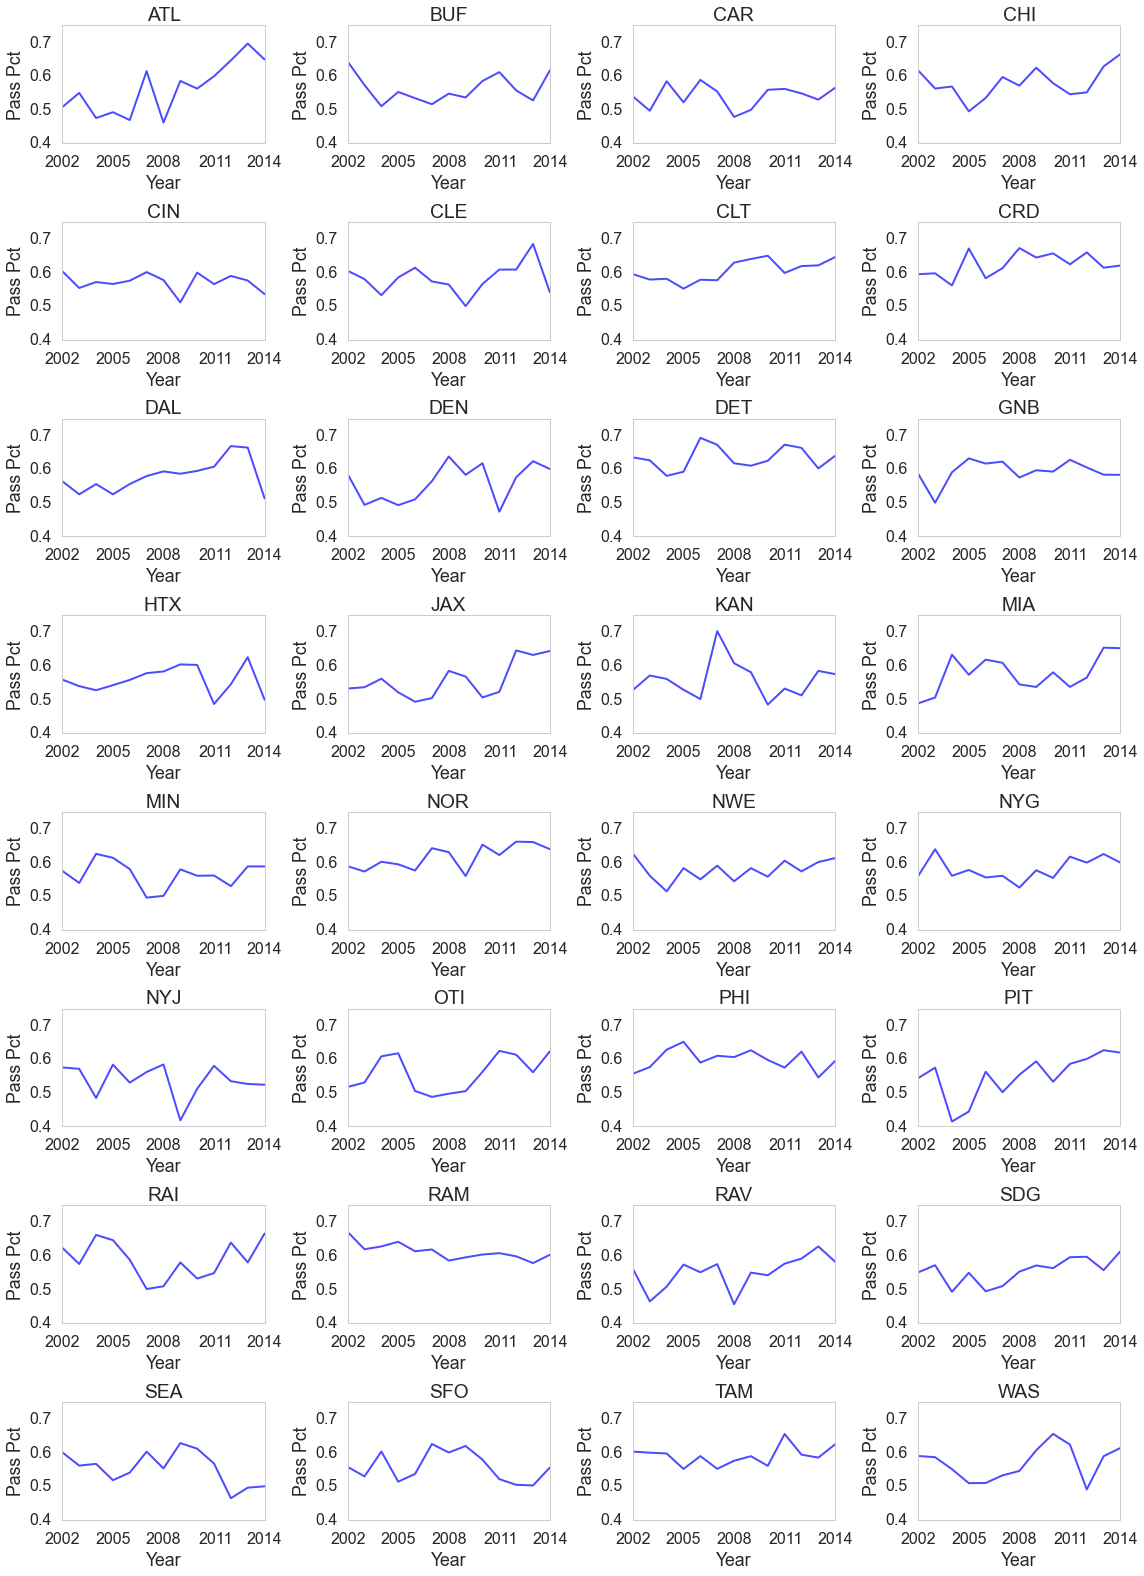

In [6]:
fig, axes = plt.subplots(8,4, figsize=(16,22),tight_layout=True)

for ax, tm in zip(axes.ravel(), teams):
    ax.plot(passpct[tm].keys(), passpct[tm].values, color='b', alpha=.7, lw=2)
    ax.set_ylim(.4,.75)
    ax.set_yticks(np.arange(.4,.8,.1))
    ax.set_xticks(np.arange(2002,2017,3))
    ax.set_title(tm.upper())
    ax.set_xlabel("Year")
    ax.set_ylabel("Pass Pct")
    ax.grid(False)
fig.savefig('images/passpct.png')

In [7]:
lg_passpct = data.groupby('year')['isPass'].mean()

In [8]:
lg_passpct

year
2002    0.577637
2003    0.557962
2004    0.560957
2005    0.563514
2006    0.559307
2007    0.576000
2008    0.564356
2009    0.574350
2010    0.579022
2011    0.582529
2012    0.587449
2013    0.597102
2014    0.596833
Name: isPass, dtype: float64

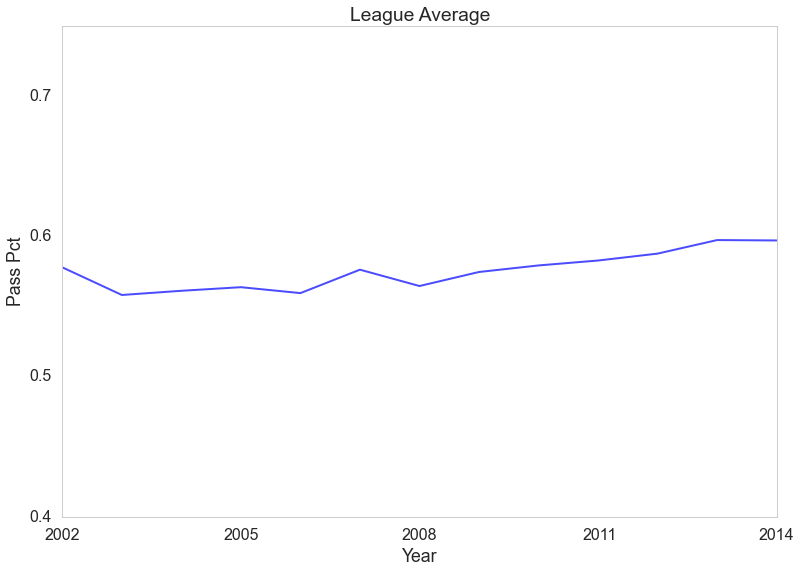

In [13]:
plt.plot(lg_passpct.keys(),lg_passpct.values, color='b', alpha=.7, linewidth=2)
plt.ylim(.4,.75)
plt.yticks(np.arange(.4,.8,.1))
plt.xticks(np.arange(2002,2017,3))
plt.title("League Average")
plt.xlabel("Year")
plt.ylabel("Pass Pct")
plt.grid(False)
plt.savefig("images/lgavg.png")

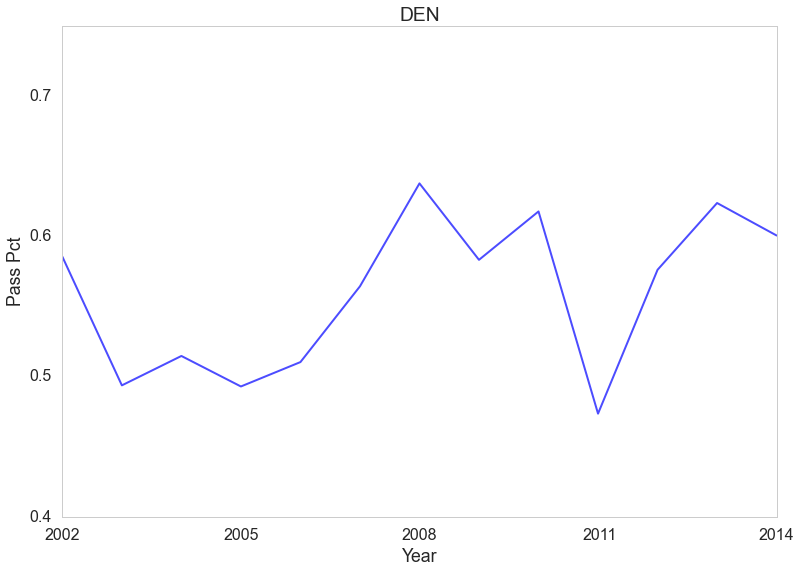

In [12]:
plt.plot(passpct['den'].keys(), passpct['den'].values, color='b', alpha=.7, linewidth=2)
plt.ylim(.4,.75)
plt.yticks(np.arange(.4,.8,.1))
plt.xticks(np.arange(2002,2017,3))
plt.title("DEN")
plt.xlabel("Year")
plt.ylabel("Pass Pct")
plt.grid(False)
plt.savefig("images/den.png")

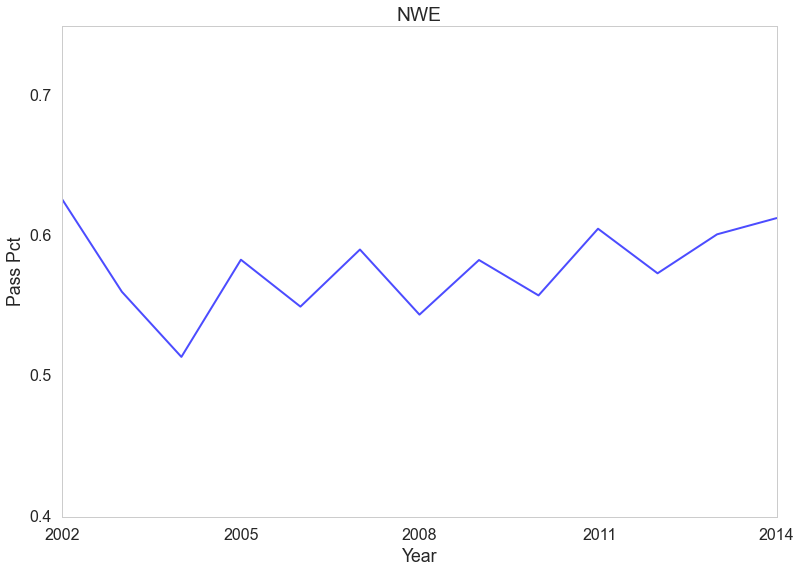

In [14]:
plt.plot(passpct['nwe'].keys(), passpct['nwe'].values, color='b', alpha=.7, linewidth=2)
plt.ylim(.4,.75)
plt.yticks(np.arange(.4,.8,.1))
plt.xticks(np.arange(2002,2017,3))
plt.title("NWE")
plt.xlabel("Year")
plt.ylabel("Pass Pct")
plt.grid(False)
plt.savefig("images/nwe.png")

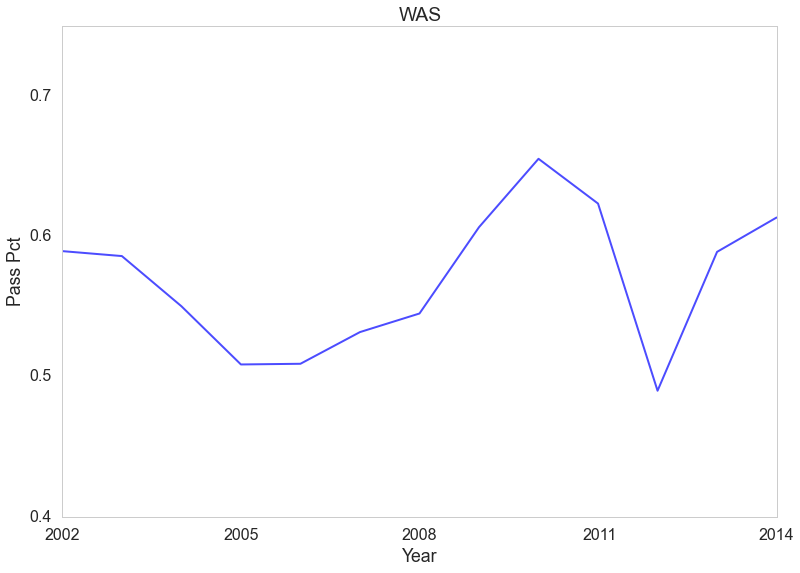

In [15]:
plt.plot(passpct['was'].keys(), passpct['was'].values, color='b', alpha=.7, linewidth=2)
plt.ylim(.4,.75)
plt.yticks(np.arange(.4,.8,.1))
plt.xticks(np.arange(2002,2017,3))
plt.title("WAS")
plt.xlabel("Year")
plt.ylabel("Pass Pct")
plt.grid(False)
plt.savefig("images/was.png")

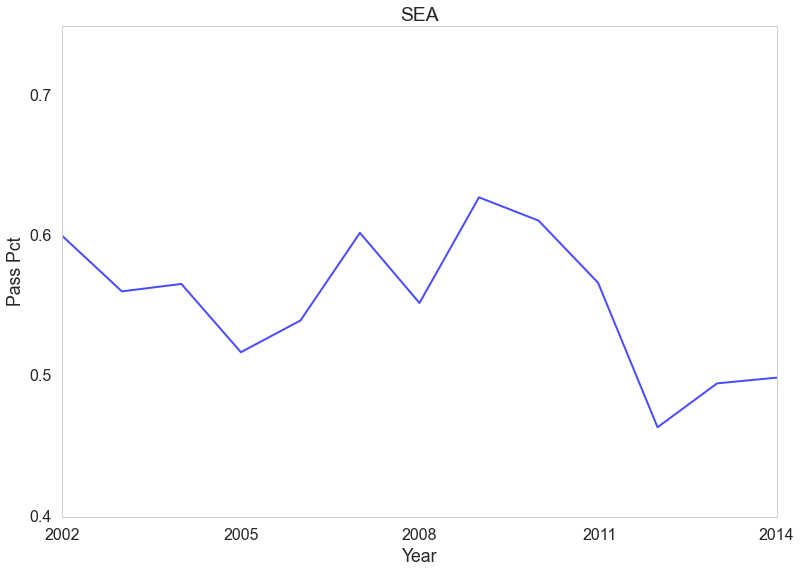

In [16]:
plt.plot(passpct['sea'].keys(), passpct['sea'].values, color='b', alpha=.7, linewidth=2)
plt.ylim(.4,.75)
plt.yticks(np.arange(.4,.8,.1))
plt.xticks(np.arange(2002,2017,3))
plt.title("SEA")
plt.xlabel("Year")
plt.ylabel("Pass Pct")
plt.grid(False)
plt.savefig("images/sea.png")